In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 일반

## Feature Selection
- 일부 변수만

### SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

data = pd.read_csv("/content/drive/MyDrive/ICR/재무비율(건설업계)/건설업계_재무비율_신용등급_merge_등급단계축소.csv")

X = data[['부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']]
y = data['등급']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7222222222222222


In [ ]:
## 백테스트
back_data = pd.read_csv("/content/drive/MyDrive/ICR/재무비율(건설업계)_백테스트_최종/건설업계_재무비율_백테스트_최종_신용등급_merge_등급단계축소.csv")

back_X = back_data[['부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']]
back_y = back_data['등급']

new_data_scaled = scaler.transform(back_X)

predicted_credit_rating = svm_model.predict(new_data_scaled)
print(f"Predicted Credit Rating for 2023: {predicted_credit_rating[0]}")

Predicted Credit Rating for 2023: AA


In [ ]:
back_data = pd.read_csv("/content/drive/MyDrive/ICR/재무비율(건설업계)_백테스트_최종/건설업계_재무비율_백테스트_최종_신용등급_merge_등급단계축소.csv")

X_backtest = back_data[['부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']]
y_backtest_actual = back_data['등급']

X_backtest_scaled = scaler.transform(X_backtest)

y_backtest_pred = svm_model.predict(X_backtest_scaled)

backtest_accuracy = accuracy_score(y_backtest_actual, y_backtest_pred)
print(f"Backtest Accuracy: {backtest_accuracy}")

### Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv("/content/drive/MyDrive/ICR/재무비율(건설업계)/건설업계_재무비율_신용등급_merge_등급단계축소.csv")

X = data[['부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']]
y = data['등급']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'모델 정확도: {accuracy}')

모델 정확도: 0.7777777777777778


In [ ]:
## 백테스트
back_data = pd.read_csv("/content/drive/MyDrive/ICR/재무비율(건설업계)_백테스트_최종/건설업계_재무비율_백테스트_최종_신용등급_merge_등급단계축소.csv")

X_backtest = back_data[['부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']]
y_backtest_actual = back_data['등급']

predicted_credit_rating = model.predict(X_backtest)
print(f'2023년 예상 신용등급: {predicted_credit_rating}')

backtest_accuracy = accuracy_score(y_backtest_actual, predicted_credit_rating)
print(f"Backtest Accuracy: {backtest_accuracy}")

2023년 예상 신용등급: ['AA' 'BB' 'BB' 'A' 'AA' 'AA' 'AA' 'AA' 'AA' 'BBB' 'BBB' 'BBB' 'A' 'A'
 'BBB' 'A' 'A' 'A' 'A' 'A' 'A' 'BB' 'BB' 'BB' 'BB' 'BB' 'BB' 'A' 'A' 'A'
 'BB' 'A' 'BB' 'BBB' 'A' 'A' 'A' 'BB' 'BBB' 'AA' 'BB' 'BB' 'A' 'BBB' 'BBB'
 'BB' 'BB' 'BB' 'A' 'BB' 'BB' 'BB' 'BB' 'BB' 'BB' 'BB' 'A' 'BBB' 'BBB'
 'BBB' 'BBB' 'BBB' 'A' 'A' 'A' 'BB' 'BBB' 'BBB']
Backtest Accuracy: 0.5588235294117647


### Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/ICR/재무비율(건설업계)/건설업계_재무비율_신용등급_merge_등급단계축소.csv")

X = data[['차입금의존도', '고정장기적합률', '매출액경상이익률', '매출액 증가율', '영업이익 증가율', '매출채권 회전기일(일)', '재고자산 회전기일(일)', '부채상환계수(배)', '부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']]
y = data['등급']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'모델 정확도: {accuracy}')
print('분류 보고서:\n', report)

모델 정확도: 0.8703703703703703
분류 보고서:
               precision    recall  f1-score   support

           A       0.87      0.87      0.87        15
          AA       0.80      1.00      0.89         4
          BB       0.89      0.89      0.89        18
         BBB       0.93      0.81      0.87        16
           D       0.50      1.00      0.67         1

    accuracy                           0.87        54
   macro avg       0.80      0.91      0.84        54
weighted avg       0.88      0.87      0.87        54



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/ICR/재무비율(건설업계)/건설업계_재무비율_신용등급_merge_등급단계축소.csv")

X = data[['부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']]
y = data['등급']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'모델 정확도: {accuracy}')
print('분류 보고서:\n', report)

모델 정확도: 0.7962962962962963
분류 보고서:
               precision    recall  f1-score   support

           A       0.78      0.93      0.85        15
          AA       0.67      1.00      0.80         4
          BB       0.83      0.83      0.83        18
         BBB       1.00      0.56      0.72        16
           D       0.33      1.00      0.50         1

    accuracy                           0.80        54
   macro avg       0.72      0.87      0.74        54
weighted avg       0.85      0.80      0.80        54



In [ ]:
## 백테스트
back_data = pd.read_csv("/content/drive/MyDrive/ICR/재무비율(건설업계)_백테스트_최종/건설업계_재무비율_백테스트_최종_신용등급_merge_등급단계축소.csv")

X_backtest = back_data[['부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']]
y_backtest_actual = back_data['등급']

predicted_credit_rating = model.predict(X_backtest)

print(f'2023년 예측 신용등급: {predicted_credit_rating}')

backtest_accuracy = accuracy_score(y_backtest_actual, predicted_credit_rating)
print(f"Backtest Accuracy: {backtest_accuracy}")

## 전체 비율

### SVM

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ICR/재무비율(건설업계)/건설업계_재무비율_신용등급_merge_등급단계축소.csv")

X = data[['차입금의존도', '고정장기적합률', '매출액경상이익률', '매출액 증가율', '영업이익 증가율', '매출채권 회전기일(일)', '재고자산 회전기일(일)', '부채상환계수(배)', '부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']]
y = data['등급']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8703703703703703


In [ ]:
back_data = pd.read_csv("/content/drive/MyDrive/ICR/재무비율(건설업계)_백테스트/건설업계_재무비율_백테스트_신용등급_merge_등급단계축소.csv")

X_backtest = back_data[['차입금의존도', '고정장기적합률', '매출액경상이익률', '매출액 증가율', '영업이익 증가율', '매출채권 회전기일(일)', '재고자산 회전기일(일)', '부채상환계수(배)', '부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']]
y_backtest_actual = back_data['등급']

X_backtest_scaled = scaler.transform(X_backtest)

y_backtest_pred = svm_model.predict(X_backtest_scaled)

backtest_accuracy = accuracy_score(y_backtest_actual, y_backtest_pred)
print(f"Backtest Accuracy: {backtest_accuracy}")

Backtest Accuracy: 0.5588235294117647


### Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv("/content/drive/MyDrive/ICR/재무비율(건설업계)/건설업계_재무비율_신용등급_merge_등급단계축소.csv")

X = data[['차입금의존도', '고정장기적합률', '매출액경상이익률', '매출액 증가율', '영업이익 증가율', '매출채권 회전기일(일)', '재고자산 회전기일(일)', '부채상환계수(배)', '부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']]
y = data['등급']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'모델 정확도: {accuracy}')

모델 정확도: 0.8703703703703703


In [ ]:
## 백테스트
back_data = pd.read_csv("/content/drive/MyDrive/ICR/재무비율(건설업계)_백테스트/건설업계_재무비율_백테스트_신용등급_merge_등급단계축소.csv")

X_backtest = back_data[['차입금의존도', '고정장기적합률', '매출액경상이익률', '매출액 증가율', '영업이익 증가율', '매출채권 회전기일(일)', '재고자산 회전기일(일)', '부채상환계수(배)', '부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']]
y_backtest_actual = back_data['등급']

predicted_credit_rating = model.predict(X_backtest)
print(f'2023년 예상 신용등급: {predicted_credit_rating}')

backtest_accuracy = accuracy_score(y_backtest_actual, predicted_credit_rating)
print(f"Backtest Accuracy: {backtest_accuracy}")

2023년 예상 신용등급: ['AA' 'AA' 'AA' 'A' 'BBB' 'BBB' 'A' 'BB' 'BB' 'A' 'A' 'A' 'BB' 'BB' 'BB'
 'BB' 'BB' 'BB' 'A' 'A' 'A' 'BB' 'BB' 'BB' 'BBB' 'BBB' 'BBB' 'A' 'BB'
 'BBB' 'AA' 'AA' 'BB' 'A' 'A' 'BBB' 'BB' 'BB' 'A' 'BBB' 'BBB' 'BB' 'BB'
 'BB' 'BB' 'BBB' 'BBB' 'BBB' 'BBB' 'BBB' 'A' 'BB' 'A' 'BB' 'BB' 'BB' 'BB'
 'BB' 'BB' 'AA' 'BB' 'BB' 'A' 'A' 'A' 'BBB' 'BBB' 'BBB']
Backtest Accuracy: 0.7058823529411765


### Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/ICR/재무비율(건설업계)/건설업계_재무비율_신용등급_merge_등급단계축소.csv")

X = data[['차입금의존도', '고정장기적합률', '매출액경상이익률', '매출액 증가율', '영업이익 증가율', '매출채권 회전기일(일)', '재고자산 회전기일(일)', '부채상환계수(배)', '부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']]
y = data['등급']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'모델 정확도: {accuracy}')
print('분류 보고서:\n', report)

모델 정확도: 0.8518518518518519
분류 보고서:
               precision    recall  f1-score   support

           A       0.87      0.87      0.87        15
          AA       0.80      1.00      0.89         4
          BB       0.84      0.89      0.86        18
         BBB       0.92      0.75      0.83        16
           D       0.50      1.00      0.67         1

    accuracy                           0.85        54
   macro avg       0.79      0.90      0.82        54
weighted avg       0.86      0.85      0.85        54



In [ ]:
## 백테스트
back_data = pd.read_csv("/content/drive/MyDrive/ICR/재무비율(건설업계)_백테스트/건설업계_재무비율_백테스트_신용등급_merge_등급단계축소.csv")

X_backtest = back_data[['차입금의존도', '고정장기적합률', '매출액경상이익률', '매출액 증가율', '영업이익 증가율', '매출채권 회전기일(일)', '재고자산 회전기일(일)', '부채상환계수(배)', '부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']]
y_backtest_actual = back_data['등급']

predicted_credit_rating = model.predict(X_backtest)   # 2023년 데이터로 예측
print(f'2023년 예측 신용등급: {predicted_credit_rating}')

backtest_accuracy = accuracy_score(y_backtest_actual, predicted_credit_rating)
print(f"Backtest Accuracy: {backtest_accuracy}")

2023년 예측 신용등급: ['AA' 'AA' 'AA' 'A' 'BBB' 'BBB' 'A' 'A' 'A' 'A' 'A' 'A' 'BB' 'BB' 'BB'
 'BB' 'BB' 'BB' 'BB' 'A' 'A' 'AA' 'A' 'A' 'BB' 'BB' 'BB' 'A' 'BBB' 'BB'
 'AA' 'AA' 'AA' 'A' 'A' 'A' 'BB' 'AA' 'A' 'A' 'A' 'BB' 'BB' 'BB' 'BB' 'A'
 'BBB' 'BBB' 'BBB' 'A' 'A' 'A' 'A' 'BB' 'BB' 'BB' 'BB' 'BB' 'BB' 'AA' 'AA'
 'AA' 'BBB' 'A' 'A' 'BBB' 'BBB' 'BBB']
Backtest Accuracy: 0.6323529411764706


### RNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding

data = pd.read_csv("/content/drive/MyDrive/ICR/재무비율(건설업계)/건설업계_재무비율_신용등급_merge_등급단계축소.csv")


le = LabelEncoder()
data['등급'] = le.fit_transform(data['등급'])   # 신용등급 수치화

X = data[['차입금의존도', '고정장기적합률', '매출액경상이익률', '매출액 증가율', '영업이익 증가율', '매출채권 회전기일(일)', '재고자산 회전기일(일)', '부채상환계수(배)', '부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']]
y = data['등급']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X = X.reshape((X.shape[0], X.shape[1], 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

model = Sequential()
model.add(SimpleRNN(16, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=8, batch_size=4, validation_split=0.2)

y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Epoch 1/8
43/43 [==============================] - 2s 17ms/step - loss: 1.7814 - accuracy: 0.2339 - val_loss: 1.7139 - val_accuracy: 0.1860
Epoch 2/8
43/43 [==============================] - 1s 12ms/step - loss: 1.5738 - accuracy: 0.3801 - val_loss: 1.5677 - val_accuracy: 0.4186
Epoch 3/8
43/43 [==============================] - 0s 6ms/step - loss: 1.4776 - accuracy: 0.4035 - val_loss: 1.5057 - val_accuracy: 0.3721
Epoch 4/8
43/43 [==============================] - 0s 5ms/step - loss: 1.4063 - accuracy: 0.4444 - val_loss: 1.4210 - val_accuracy: 0.4186
Epoch 5/8
43/43 [==============================] - 0s 6ms/step - loss: 1.3569 - accuracy: 0.4503 - val_loss: 1.3533 - val_accuracy: 0.4419
Epoch 6/8
43/43 [==============================] - 0s 6ms/step - loss: 1.2806 - accuracy: 0.5029 - val_loss: 1.2661 - val_accuracy: 0.4884
Epoch 7/8
43/43 [==============================] - 0s 6ms/step - loss: 1.2035 - accuracy: 0.5614 - val_loss: 1.1916 - val_accuracy: 0.5116
Epoch 8/8
2/2 [==========

# 업계평균이랑 비교

In [ ]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/ICR/재무비율(건설업계)/건설업계_재무비율_신용등급_merge_등급단계축소.csv")

selected_columns = ['차입금의존도', '고정장기적합률', '매출액경상이익률', '매출액 증가율', '영업이익 증가율', '매출채권 회전기일(일)', '재고자산 회전기일(일)', '부채상환계수(배)', '부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']

for column in selected_columns:
    column_mean = data[column].mean()
    data[column] = data[column] / column_mean   # 모든 열에 대해 반복하여 평균값으로 나누기

data = pd.DataFrame(data)
data

,Unnamed: 0,ID,기업명,연도,보고서 코드,부채비율,차입금의존도,고정장기적합률,자기자본순이익률,매출액영업이익률,...,재고자산 회전기일(일),매입채무 회전기일(일),총자산 회전율,부채상환계수(배),총차입금상환능력비율,종목코드,종목명,회사명,등급,연분기
0,0,13580202001,계룡건설산업,2020,1분기보고서,1.538728,2.002264,1.316107,0.767824,1.278357,...,0.307761,2.073164,0.502884,0.018155,0.124559,13580,계룡건설산업,계룡건설산업,BBB,202001
1,1,13580202002,계룡건설산업,2020,반기보고서,1.483193,1.934727,1.293725,1.083589,1.722090,...,0.606330,3.749556,0.573097,0.032899,0.237367,13580,계룡건설산업,계룡건설산업,BBB,202002
2,2,13580202003,계룡건설산업,2020,3분기보고서,1.270162,1.793549,1.039333,1.360438,2.006976,...,0.603014,4.051390,0.589168,0.085805,0.388921,13580,계룡건설산업,계룡건설산업,BBB,202003
3,3,13580202004,계룡건설산업,2020,사업보고서,1.144634,1.658127,1.015433,4.067010,1.743827,...,0.232799,1.249994,2.323896,0.119942,0.520951,13580,계룡건설산업,계룡건설산업,BBB,202004
4,4,13580202101,계룡건설산업,2021,1분기보고서,1.276038,1.351078,1.091920,0.870275,1.475827,...,0.309458,1.632093,0.492409,0.069605,0.370189,13580,계룡건설산업,계룡건설산업,BBB,202101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,263,1470202104,삼부토건,2021,사업보고서,0.535125,0.969904,0.470775,0.056752,-0.231244,...,1.871745,1.547232,1.519523,-0.108576,-1.131938,1470,삼부토건,삼부토건,BB,202104
264,264,1470202201,삼부토건,2022,1분기보고서,0.442507,1.008274,0.425581,0.123433,-0.458603,...,2.156664,2.443538,0.337786,-0.003430,-0.041746,1470,삼부토건,삼부토건,BB,202201
265,265,1470202202,삼부토건,2022,반기보고서,0.504065,1.275432,0.458231,-0.364796,-0.858938,...,2.899007,4.465132,0.401945,-0.014329,-0.151074,1470,삼부토건,삼부토건,BB,202202
266,266,1470202203,삼부토건,2022,3분기보고서,0.526355,1.419346,0.445935,-0.864577,-2.215868,...,3.700427,1.791117,0.468389,-0.024564,-0.196463,1470,삼부토건,삼부토건,BB,202203


## Feature Selection

### SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

data = pd.read_csv("/content/drive/MyDrive/ICR/재무비율(건설업계)/건설업계_재무비율_신용등급_merge_등급단계축소.csv")

selected_columns = ['차입금의존도', '고정장기적합률', '매출액경상이익률', '매출액 증가율', '영업이익 증가율', '매출채권 회전기일(일)', '재고자산 회전기일(일)', '부채상환계수(배)', '부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']

for column in selected_columns:
    column_mean = data[column].mean()
    data[column] = data[column] / column_mean    # 모든 열에 대해 반복하여 평균값으로 나누기

data = pd.DataFrame(data)

X = data[['부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']]
y = data['등급']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7407407407407407


In [ ]:
## 백테스트
back_data = pd.read_csv("/content/drive/MyDrive/ICR/재무비율(건설업계)_백테스트/건설업계_재무비율_백테스트_신용등급_merge_등급단계축소.csv")

selected_columns = ['차입금의존도', '고정장기적합률', '매출액경상이익률', '매출액 증가율', '영업이익 증가율', '매출채권 회전기일(일)', '재고자산 회전기일(일)', '부채상환계수(배)', '부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']


for column in selected_columns:
    column_mean = back_data[column].mean()
    back_data[column] = back_data[column] / column_mean   # 모든 열에 대해 반복하여 평균값으로 나누기

back_data = pd.DataFrame(back_data)

back_X = back_data[['부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']]
back_y = back_data['등급']

new_data_scaled = scaler.transform(back_X)  # 표준화

predicted_credit_rating = svm_model.predict(new_data_scaled)
print(f"Predicted Credit Rating for 2023: {predicted_credit_rating[0]}")

Predicted Credit Rating for 2023: BB


In [ ]:
back_data = pd.read_csv("/content/drive/MyDrive/ICR/재무비율(건설업계)_백테스트/건설업계_재무비율_백테스트_신용등급_merge_등급단계축소.csv")

selected_columns = ['차입금의존도', '고정장기적합률', '매출액경상이익률', '매출액 증가율', '영업이익 증가율', '매출채권 회전기일(일)', '재고자산 회전기일(일)', '부채상환계수(배)', '부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']

for column in selected_columns:
    column_mean = back_data[column].mean()
    back_data[column] = back_data[column] / column_mean     # 모든 열에 대해 반복하여 평균값으로 나누기

back_data = pd.DataFrame(back_data)

X_backtest = back_data[['부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']]
y_backtest_actual = back_data['등급']

X_backtest_scaled = scaler.transform(X_backtest)

y_backtest_pred = svm_model.predict(X_backtest_scaled)

backtest_accuracy = accuracy_score(y_backtest_actual, y_backtest_pred)
print(f"Backtest Accuracy: {backtest_accuracy}")

### Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv("/content/drive/MyDrive/ICR/재무비율(건설업계)/건설업계_재무비율_신용등급_merge_등급단계축소.csv")

selected_columns = ['차입금의존도', '고정장기적합률', '매출액경상이익률', '매출액 증가율', '영업이익 증가율', '매출채권 회전기일(일)', '재고자산 회전기일(일)', '부채상환계수(배)', '부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']

for column in selected_columns:
    column_mean = data[column].mean()
    data[column] = data[column] / column_mean    # 모든 열에 대해 반복하여 평균값으로 나누기

data = pd.DataFrame(data)

X = data[['부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']]
y = data['등급']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'모델 정확도: {accuracy}')

모델 정확도: 0.8888888888888888


In [ ]:
## 백테스트
back_data = pd.read_csv("/content/drive/MyDrive/ICR/재무비율(건설업계)_백테스트/건설업계_재무비율_백테스트_신용등급_merge_등급단계축소.csv")

selected_columns = ['차입금의존도', '고정장기적합률', '매출액경상이익률', '매출액 증가율', '영업이익 증가율', '매출채권 회전기일(일)', '재고자산 회전기일(일)', '부채상환계수(배)', '부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']

for column in selected_columns:
    column_mean = back_data[column].mean()
    back_data[column] = back_data[column] / column_mean    # 모든 열에 대해 반복하여 평균값으로 나누기

back_data = pd.DataFrame(back_data)

X_backtest = back_data[['부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']]
y_backtest_actual = back_data['등급']

predicted_credit_rating = model.predict(X_backtest)
print(f'2023년 예상 신용등급: {predicted_credit_rating}')

backtest_accuracy = accuracy_score(y_backtest_actual, predicted_credit_rating)
print(f"Backtest Accuracy: {backtest_accuracy}")

2023년 예상 신용등급: ['BB' 'BB' 'BB' 'BB' 'BBB' 'A' 'BBB' 'BBB' 'BBB' 'A' 'A' 'A' 'BB' 'BB'
 'BB' 'BB' 'BB' 'BB' 'BBB' 'BBB' 'BBB' 'BB' 'BB' 'BB' 'BB' 'BBB' 'BBB'
 'BB' 'BB' 'BB' 'BB' 'BB' 'BB' 'A' 'A' 'BBB' 'BB' 'BB' 'BB' 'A' 'BBB' 'BB'
 'BB' 'BB' 'BB' 'BB' 'BBB' 'BBB' 'BBB' 'BBB' 'A' 'A' 'A' 'BB' 'BB' 'BB'
 'BB' 'BB' 'BB' 'BB' 'BB' 'BB' 'BB' 'BB' 'BB' 'BBB' 'A' 'BBB']
Backtest Accuracy: 0.5441176470588235


### Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/ICR/재무비율(건설업계)/건설업계_재무비율_신용등급_merge_등급단계축소.csv")

selected_columns = ['차입금의존도', '고정장기적합률', '매출액경상이익률', '매출액 증가율', '영업이익 증가율', '매출채권 회전기일(일)', '재고자산 회전기일(일)', '부채상환계수(배)', '부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']

for column in selected_columns:
    column_mean = data[column].mean()
    data[column] = data[column] / column_mean    # 모든 열에 대해 반복하여 평균값으로 나누기

data = pd.DataFrame(data)

X = data[['부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']]
y = data['등급']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'모델 정확도: {accuracy}')
print('분류 보고서:\n', report)

모델 정확도: 0.8518518518518519
분류 보고서:
               precision    recall  f1-score   support

           A       0.87      0.87      0.87        15
          AA       0.80      1.00      0.89         4
          BB       0.80      0.89      0.84        18
         BBB       1.00      0.75      0.86        16
           D       0.50      1.00      0.67         1

    accuracy                           0.85        54
   macro avg       0.79      0.90      0.82        54
weighted avg       0.87      0.85      0.85        54



In [ ]:
## 백테스트
back_data = pd.read_csv("/content/drive/MyDrive/ICR/재무비율(건설업계)_백테스트/건설업계_재무비율_백테스트_신용등급_merge_등급단계축소.csv")

selected_columns = ['차입금의존도', '고정장기적합률', '매출액경상이익률', '매출액 증가율', '영업이익 증가율', '매출채권 회전기일(일)', '재고자산 회전기일(일)', '부채상환계수(배)', '부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']

for column in selected_columns:
    column_mean = back_data[column].mean()
    back_data[column] = back_data[column] / column_mean     # 모든 열에 대해 반복하여 평균값으로 나누기

back_data = pd.DataFrame(back_data)

X_backtest = back_data[['부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']]
y_backtest_actual = back_data['등급']

predicted_credit_rating = model.predict(X_backtest)

print(f'2023년 예측 신용등급: {predicted_credit_rating}')

backtest_accuracy = accuracy_score(y_backtest_actual, predicted_credit_rating)
print(f"Backtest Accuracy: {backtest_accuracy}")

2023년 예측 신용등급: ['AA' 'AA' 'AA' 'BB' 'BB' 'BBB' 'BBB' 'BBB' 'BBB' 'A' 'A' 'A' 'BB' 'AA'
 'BB' 'D' 'BB' 'BB' 'BBB' 'BBB' 'BBB' 'BB' 'BBB' 'BB' 'BB' 'BB' 'BBB' 'BB'
 'BB' 'BB' 'AA' 'AA' 'BB' 'A' 'BB' 'BB' 'BB' 'BB' 'BB' 'A' 'BB' 'AA' 'BB'
 'BB' 'A' 'BB' 'BBB' 'BBB' 'BBB' 'BBB' 'BB' 'BB' 'BB' 'BB' 'A' 'BB' 'BB'
 'BB' 'BB' 'BB' 'AA' 'BB' 'A' 'A' 'BB' 'BBB' 'BBB' 'BBB']
Backtest Accuracy: 0.5735294117647058


## 전체 비율

### SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

data = pd.read_csv("/content/drive/MyDrive/ICR/재무비율(건설업계)/건설업계_재무비율_신용등급_merge_등급단계축소.csv")

selected_columns = ['차입금의존도', '고정장기적합률', '매출액경상이익률', '매출액 증가율', '영업이익 증가율', '매출채권 회전기일(일)', '재고자산 회전기일(일)', '부채상환계수(배)', '부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']

for column in selected_columns:
    column_mean = data[column].mean()
    data[column] = data[column] / column_mean    # 모든 열에 대해 반복하여 평균값으로 나누기

data = pd.DataFrame(data)

X = data[['차입금의존도', '고정장기적합률', '매출액경상이익률', '매출액 증가율', '영업이익 증가율', '매출채권 회전기일(일)', '재고자산 회전기일(일)', '부채상환계수(배)', '부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']]
y = data['등급']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8703703703703703


In [ ]:
## 백테스트
back_data = pd.read_csv("/content/drive/MyDrive/ICR/재무비율(건설업계)_백테스트/건설업계_재무비율_백테스트_신용등급_merge_등급단계축소.csv")

selected_columns = ['차입금의존도', '고정장기적합률', '매출액경상이익률', '매출액 증가율', '영업이익 증가율', '매출채권 회전기일(일)', '재고자산 회전기일(일)', '부채상환계수(배)', '부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']

for column in selected_columns:
    column_mean = back_data[column].mean()
    back_data[column] = back_data[column] / column_mean  # 모든 열에 대해 반복하여 평균값으로 나누기

back_data = pd.DataFrame(back_data)

back_X = back_data[['차입금의존도', '고정장기적합률', '매출액경상이익률', '매출액 증가율', '영업이익 증가율', '매출채권 회전기일(일)', '재고자산 회전기일(일)', '부채상환계수(배)', '부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']]
back_y = back_data['등급']

new_data_scaled = scaler.transform(back_X)

predicted_credit_rating = svm_model.predict(new_data_scaled)
print(f"Predicted Credit Rating for 2023: {predicted_credit_rating[0]}")

Predicted Credit Rating for 2023: BB


In [ ]:
back_data = pd.read_csv("/content/drive/MyDrive/ICR/재무비율(건설업계)_백테스트/건설업계_재무비율_백테스트_신용등급_merge_등급단계축소.csv")

selected_columns = ['차입금의존도', '고정장기적합률', '매출액경상이익률', '매출액 증가율', '영업이익 증가율', '매출채권 회전기일(일)', '재고자산 회전기일(일)', '부채상환계수(배)', '부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']

for column in selected_columns:
    column_mean = back_data[column].mean()
    back_data[column] = back_data[column] / column_mean    # 모든 열에 대해 반복하여 평균값으로 나누기

back_data = pd.DataFrame(back_data)

X_backtest = back_data[['차입금의존도', '고정장기적합률', '매출액경상이익률', '매출액 증가율', '영업이익 증가율', '매출채권 회전기일(일)', '재고자산 회전기일(일)', '부채상환계수(배)', '부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']]
y_backtest_actual = back_data['등급']

X_backtest_scaled = scaler.transform(X_backtest)

y_backtest_pred = svm_model.predict(X_backtest_scaled)

backtest_accuracy = accuracy_score(y_backtest_actual, y_backtest_pred)
print(f"Backtest Accuracy: {backtest_accuracy}")

### Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv("/content/drive/MyDrive/ICR_project/재무비율(건설업계)/건설업계_재무비율_신용등급_merge_등급단계축소.csv")

selected_columns = ['차입금의존도', '고정장기적합률', '매출액경상이익률', '매출액 증가율', '영업이익 증가율', '매출채권 회전기일(일)', '재고자산 회전기일(일)', '부채상환계수(배)', '부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']

for column in selected_columns:
    column_mean = data[column].mean()
    data[column] = data[column] / column_mean    # 모든 열에 대해 반복하여 평균값으로 나누기

data = pd.DataFrame(data)

X = data[['차입금의존도', '고정장기적합률', '매출액경상이익률', '매출액 증가율', '영업이익 증가율', '매출채권 회전기일(일)', '재고자산 회전기일(일)', '부채상환계수(배)', '부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']]
y = data['등급']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'2022년-2023년 예상등급: {y_pred}')

accuracy = accuracy_score(y_test, y_pred)
print(f'모델 정확도: {accuracy}')

2022년-2023년 예상등급: ['BB' 'A' 'A' 'A' 'BB' 'BB' 'BBB' 'BBB' 'BB' 'BBB' 'BB' 'BBB' 'BB' 'A'
 'BBB' 'A' 'BB' 'BB' 'BBB' 'A' 'BBB' 'BB' 'BB' 'BB' 'BBB' 'BB' 'A' 'BB'
 'AA' 'BB' 'BBB' 'BB' 'BB' 'A' 'BBB' 'A' 'A' 'A' 'D' 'A' 'BB' 'BBB' 'BB'
 'BBB' 'BB' 'BBB' 'AA' 'AA' 'A' 'A' 'A' 'A' 'BBB' 'BBB']
모델 정확도: 0.9629629629629629


In [ ]:
import matplotlib.font_manager as fm
font_path = fm.findfont(fm.FontProperties(family='DejaVuSans'))
print(font_path)

/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib import font_manager, rc
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

## 나눔 폰트 설치
!apt-get update -qq
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm -rf ~/.cache/matplotlib

# # 나눔 폰트로 설정
# font_path = '/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
# font_name = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font_name)


!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

AttributeError: ignored

In [ ]:
# !pip install --upgrade matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 53.8 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

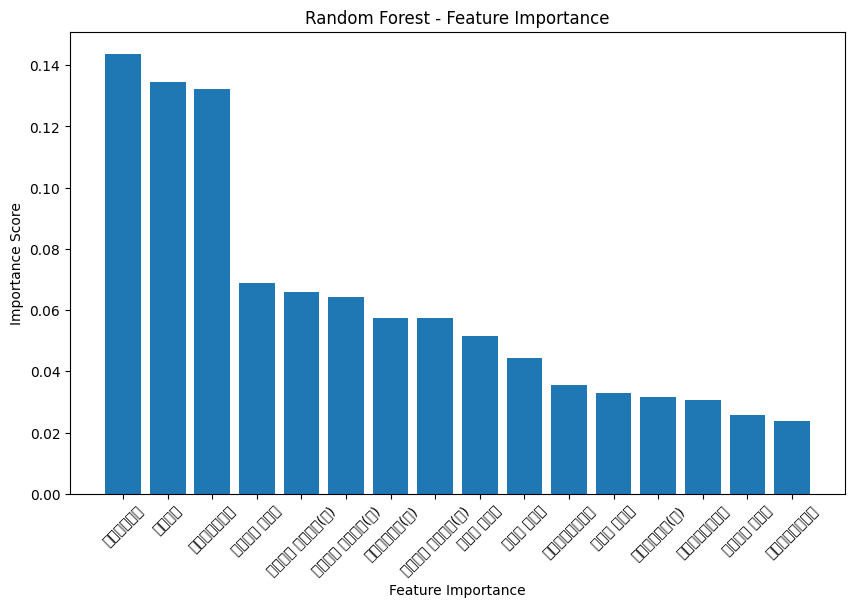

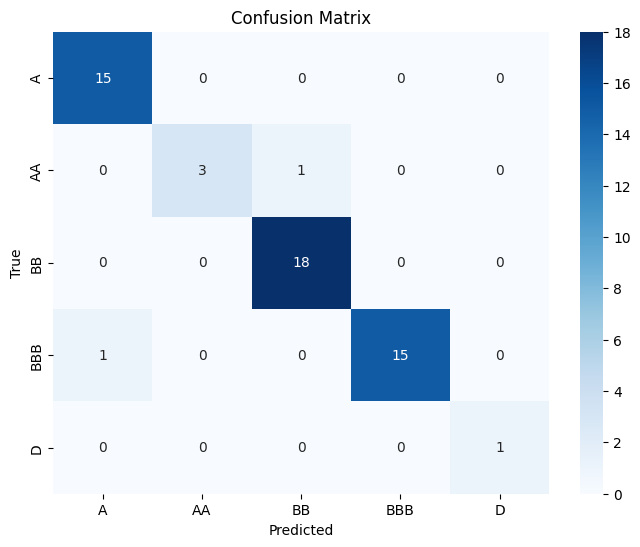

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

## 특성 중요도 시각화
feature_importances = model.feature_importances_
feature_names = X.columns

indices = feature_importances.argsort()[::-1]   # 중요도를 내림차순으로 정렬

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45)
plt.xlabel('Feature Importance')
plt.ylabel('Importance Score')
plt.title('Random Forest - Feature Importance')
plt.show()

## 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
## 백테스트
back_data = pd.read_csv("/content/drive/MyDrive/ICR/재무비율(건설업계)_백테스트/건설업계_재무비율_백테스트_신용등급_merge_등급단계축소.csv")

selected_columns = ['차입금의존도', '고정장기적합률', '매출액경상이익률', '매출액 증가율', '영업이익 증가율', '매출채권 회전기일(일)', '재고자산 회전기일(일)', '부채상환계수(배)', '부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']

for column in selected_columns:
    column_mean = back_data[column].mean()
    back_data[column] = back_data[column] / column_mean   # 모든 열에 대해 반복하여 평균값으로 나누기

back_data = pd.DataFrame(back_data)

X_backtest = back_data[['차입금의존도', '고정장기적합률', '매출액경상이익률', '매출액 증가율', '영업이익 증가율', '매출채권 회전기일(일)', '재고자산 회전기일(일)', '부채상환계수(배)', '부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']]
y_backtest_actual = back_data['등급']

predicted_credit_rating = model.predict(X_backtest)   # 2023년 데이터로 예측
print(f'2023년 예상 신용등급: {predicted_credit_rating}')

backtest_accuracy = accuracy_score(y_backtest_actual, predicted_credit_rating)
print(f"Backtest Accuracy: {backtest_accuracy}")

2023년 예상 신용등급: ['AA' 'AA' 'BB' 'A' 'BBB' 'BBB' 'A' 'BB' 'BB' 'A' 'A' 'A' 'BB' 'BB' 'BB'
 'BB' 'BB' 'BB' 'BB' 'BB' 'BB' 'BB' 'BB' 'BB' 'BBB' 'BBB' 'BBB' 'BBB'
 'BBB' 'BBB' 'BB' 'BB' 'BB' 'A' 'A' 'A' 'BB' 'BB' 'BB' 'A' 'A' 'BB' 'BB'
 'BB' 'BB' 'BB' 'BBB' 'BBB' 'BBB' 'BBB' 'BB' 'BB' 'BB' 'BB' 'BB' 'BB' 'BB'
 'BB' 'BB' 'AA' 'AA' 'BB' 'A' 'A' 'BB' 'BBB' 'BBB' 'BBB']
Backtest Accuracy: 0.6764705882352942


### Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/ICR/재무비율(건설업계)/건설업계_재무비율_신용등급_merge_등급단계축소.csv")

selected_columns = ['차입금의존도', '고정장기적합률', '매출액경상이익률', '매출액 증가율', '영업이익 증가율', '매출채권 회전기일(일)', '재고자산 회전기일(일)', '부채상환계수(배)', '부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']

for column in selected_columns:
    column_mean = data[column].mean()
    data[column] = data[column] / column_mean  # 모든 열에 대해 반복하여 평균값으로 나누기

data = pd.DataFrame(data)

X = data[['차입금의존도', '고정장기적합률', '매출액경상이익률', '매출액 증가율', '영업이익 증가율', '매출채권 회전기일(일)', '재고자산 회전기일(일)', '부채상환계수(배)', '부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']]
y = data['등급']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'모델 정확도: {accuracy}')
print('분류 보고서:\n', report)

모델 정확도: 0.8518518518518519
분류 보고서:
               precision    recall  f1-score   support

           A       0.93      0.87      0.90        15
          AA       0.80      1.00      0.89         4
          BB       0.83      0.83      0.83        18
         BBB       0.87      0.81      0.84        16
           D       0.50      1.00      0.67         1

    accuracy                           0.85        54
   macro avg       0.79      0.90      0.82        54
weighted avg       0.86      0.85      0.85        54



In [ ]:
## 백테스트
back_data = pd.read_csv("/content/drive/MyDrive/ICR/재무비율(건설업계)_백테스트/건설업계_재무비율_백테스트_신용등급_merge_등급단계축소.csv")

selected_columns = ['차입금의존도', '고정장기적합률', '매출액경상이익률', '매출액 증가율', '영업이익 증가율', '매출채권 회전기일(일)', '재고자산 회전기일(일)', '부채상환계수(배)', '부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']

for column in selected_columns:
    column_mean = back_data[column].mean()
    back_data[column] = back_data[column] / column_mean    # 모든 열에 대해 반복하여 평균값으로 나누기

back_data = pd.DataFrame(back_data)

X_backtest = back_data[['차입금의존도', '고정장기적합률', '매출액경상이익률', '매출액 증가율', '영업이익 증가율', '매출채권 회전기일(일)', '재고자산 회전기일(일)', '부채상환계수(배)', '부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']]
y_backtest_actual = back_data['등급']

predicted_credit_rating = model.predict(X_backtest) # 2023년 데이터로 예측
print(f'2023년 예측 신용등급: {predicted_credit_rating}')

backtest_accuracy = accuracy_score(y_backtest_actual, predicted_credit_rating)
print(f"Backtest Accuracy: {backtest_accuracy}")

2023년 예측 신용등급: ['AA' 'AA' 'AA' 'A' 'D' 'BBB' 'BB' 'BBB' 'BB' 'A' 'A' 'A' 'BB' 'BB' 'BB'
 'BB' 'D' 'BB' 'BB' 'BB' 'BB' 'AA' 'BB' 'BB' 'BBB' 'BBB' 'BB' 'BBB' 'BBB'
 'BBB' 'AA' 'BB' 'BB' 'A' 'A' 'A' 'D' 'D' 'BBB' 'A' 'A' 'BB' 'BB' 'BB'
 'BB' 'BBB' 'BBB' 'BBB' 'BBB' 'BBB' 'BB' 'BB' 'BB' 'A' 'A' 'A' 'BB' 'BB'
 'BB' 'AA' 'AA' 'AA' 'A' 'BB' 'BBB' 'BBB' 'BBB' 'BBB']
Backtest Accuracy: 0.6176470588235294


### RNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding

data = pd.read_csv("/content/drive/MyDrive/ICR/재무비율(건설업계)/건설업계_재무비율_신용등급_merge_등급단계축소.csv")

selected_columns = ['차입금의존도', '고정장기적합률', '매출액경상이익률', '매출액 증가율', '영업이익 증가율', '매출채권 회전기일(일)', '재고자산 회전기일(일)', '부채상환계수(배)', '부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']

for column in selected_columns:
    column_mean = data[column].mean()
    data[column] = data[column] / column_mean  # 모든 열에 대해 반복하여 평균값으로 나누기

data = pd.DataFrame(data)

# 데이터 전처리(신용등급 수치화)
le = LabelEncoder()
data['등급'] = le.fit_transform(data['등급'])

X = data[['차입금의존도', '고정장기적합률', '매출액경상이익률', '매출액 증가율', '영업이익 증가율', '매출채권 회전기일(일)', '재고자산 회전기일(일)', '부채상환계수(배)', '부채비율', '자기자본순이익률', '매출액영업이익률', '이자보상배율(배)', '총자산 증가율', '자기자본 증가율', '매입채무 회전기일(일)', '총자산 회전율']]
y = data['등급']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X = X.reshape((X.shape[0], X.shape[1], 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

model = Sequential()
model.add(SimpleRNN(16, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=10, batch_size=4, validation_split=0.2)

y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Epoch 1/10
43/43 [==============================] - 3s 23ms/step - loss: 1.9364 - accuracy: 0.1345 - val_loss: 1.6623 - val_accuracy: 0.3721
Epoch 2/10
43/43 [==============================] - 1s 13ms/step - loss: 1.7704 - accuracy: 0.2222 - val_loss: 1.5341 - val_accuracy: 0.4651
Epoch 3/10
43/43 [==============================] - 1s 12ms/step - loss: 1.6307 - accuracy: 0.3860 - val_loss: 1.4379 - val_accuracy: 0.5814
Epoch 4/10
43/43 [==============================] - 1s 13ms/step - loss: 1.5042 - accuracy: 0.4854 - val_loss: 1.3479 - val_accuracy: 0.5814
Epoch 5/10
43/43 [==============================] - 1s 13ms/step - loss: 1.4026 - accuracy: 0.5263 - val_loss: 1.2525 - val_accuracy: 0.6512
Epoch 6/10
43/43 [==============================] - 0s 7ms/step - loss: 1.3180 - accuracy: 0.5556 - val_loss: 1.1717 - val_accuracy: 0.6512
Epoch 7/10
43/43 [==============================] - 0s 11ms/step - loss: 1.2454 - accuracy: 0.5380 - val_loss: 1.1086 - val_accuracy: 0.6512
Epoch 8/10
43/

2/2 [==============================] - 0s 27ms/step
Accuracy: 0.6481481481481481
